**Instruction:**

Analyze the 'Climate change in Africa' dataset by visualizing temperature fluctuations across five African countries from 1980 to 2023.

Focus on specific tasks like plotting temperature trends, comparing histograms of temperature distributions, and determining the most effective chart for representing average temperatures per country.

In [ ]:
# To silence warnings for a cleaner output

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Loading the dataset into a DataFrame
df = pd.read_csv("Africa_climate_change.csv")

In [ ]:
# 2. Data Cleaning
print("Data Overview: \n")
print(df.head(), "\n")

# Checking for missing values and data types
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Converting DATE column to datetime
df["DATE"] = pd.to_datetime(df["DATE"].astype(str).str[:8], format="%Y%m%d")

# Filling missing TAVG using the mean of TMIN and TMAX when available
df["TAVG"] = df["TAVG"].fillna((df["TMIN"] + df["TMAX"]) / 2)

# Filling missing TMAX using TAVG and TMIN if available
df["TMAX"] = df["TMAX"].fillna(2 * df["TAVG"] - df["TMIN"])

# Filling missing TMIN using TAVG and TMAX if available
df["TMIN"] = df["TMIN"].fillna(2 * df["TAVG"] - df["TMAX"])

# Droping rows where both TMAX and TMIN are still missing
df = df.dropna(subset=["TMAX", "TMIN"], how="all")

# Replacing NaN with 0 (assuming missing means no rain)
df["PRCP"] = df["PRCP"].fillna(0)

Data Overview: 

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB
None

Missing Values:
DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64


From the **Data Overview** above, the **DATE** column appears to be in a non-standard format (19800101 000000). **PRCP** (Precipitation) has many missing values. **TAVG** (Average Temperature), **TMAX** (Maximum Temperature), and **TMIN** (Minimum Temperature) also have some missing values.

- I converted the **DATE** column into a proper **datetime format** and filled missing **TAVG** values using the mean of **TMIN** and **TMAX**.

- For the **TMAX** and **TMIN** columns, where one value (TMAX or TMIN) is missing, I estimated it using TAVG and the available value.

**TMAX = 2 x TAVG - TMIN**

**TMIN = 2 x TAVG - TMAX**

Where both TMAX and TMIN are missing, I dropped those rows.

- Since precipitation can be 0 on many days, I replaced the **NaNs** in the **PRCP** column with 0 mm (assuming no rain was recorded on those days).

In [ ]:
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.0,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.0,Tunisia
4,1980-01-01,0.0,75.0,91.0,59.0,Cameroon


In [ ]:
df.isnull().sum()

,0
DATE,0
PRCP,0
TAVG,4
TMAX,2
TMIN,2
COUNTRY,0


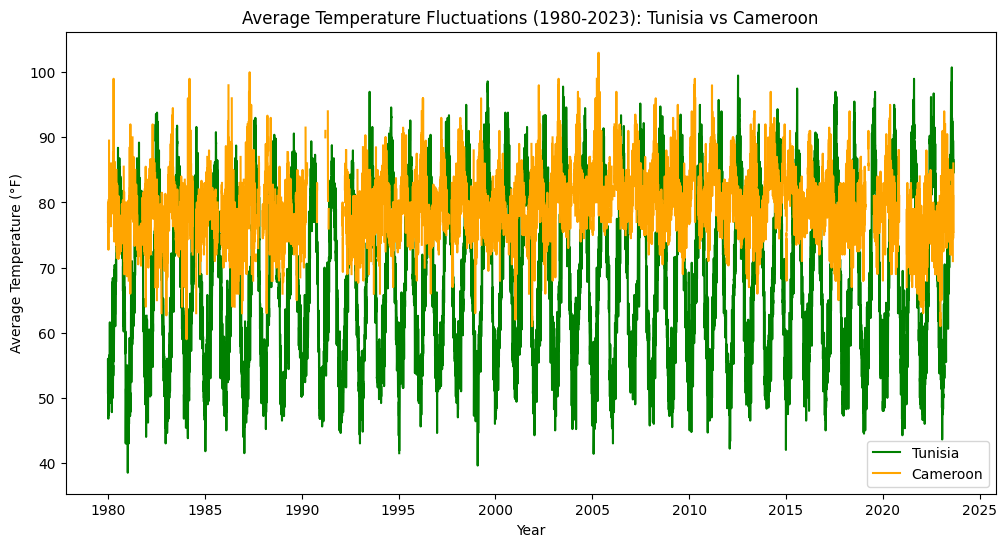

In [ ]:
# 3. Plotting a line chart to show the average temperature fluctuations in Tunisia and Cameroon

# Filtering data for Tunisia and Cameroon
tuni_cam_df = df[df["COUNTRY"].isin(["Tunisia", "Cameroon"])]

# Grouping by DATE and COUNTRY to calculate the mean temperature per day
temp_trends = tuni_cam_df.groupby(["DATE", "COUNTRY"])["TAVG"].mean().unstack()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(temp_trends.index, temp_trends["Tunisia"], label="Tunisia", color="green")
plt.plot(temp_trends.index, temp_trends["Cameroon"], label="Cameroon", color="orange")

# Formatting
plt.title("Average Temperature Fluctuations (1980-2023): Tunisia vs Cameroon")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(False)

# Show plot
plt.show()

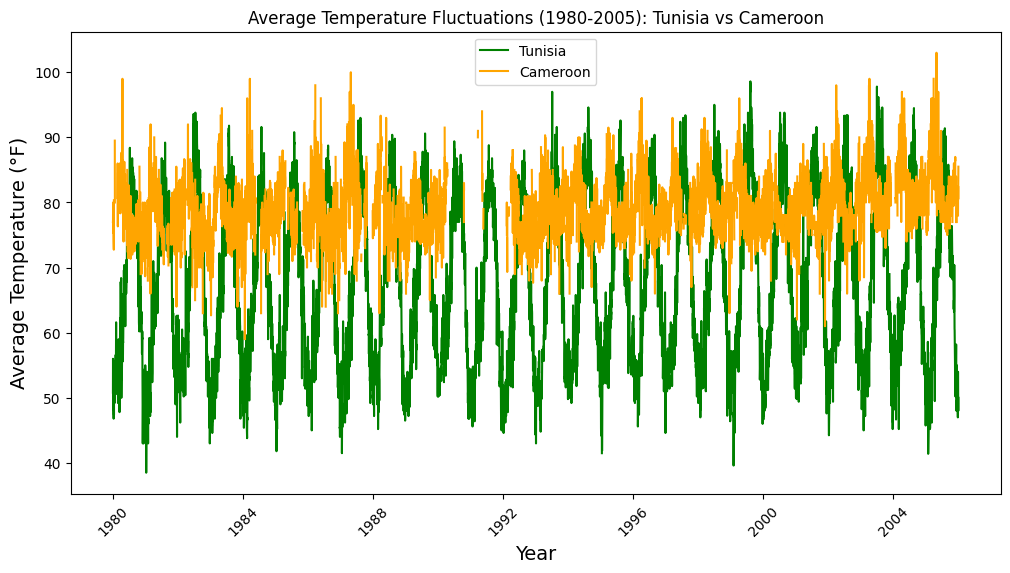

In [ ]:
# 4. Zooming in to show the average temperature fluctuations in Tunisia and Cameroon between 1980 1nd 2005

# Filtering data between 1980 and 2005
zoomed_df = tuni_cam_df[(tuni_cam_df["DATE"] >= "1980-01-01") & (tuni_cam_df["DATE"] <= "2005-12-31")]

# Grouping by DATE and COUNTRY for mean temperature
temp_trends_zoomed = zoomed_df.groupby(["DATE", "COUNTRY"])["TAVG"].mean().unstack()

# Plotting zoomed-in trends
plt.figure(figsize=(12, 6))
plt.plot(temp_trends_zoomed.index, temp_trends_zoomed["Tunisia"], label="Tunisia", color="green")
plt.plot(temp_trends_zoomed.index, temp_trends_zoomed["Cameroon"], label="Cameroon", color="orange")

# Formatting
plt.title("Average Temperature Fluctuations (1980-2005): Tunisia vs Cameroon")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Temperature (°F)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(False)

plt.show()

The graph above compares Tunisia and Cameroon’s temperature trends from **1980 to 2005**.

- **Tunisia (Green Line):** Shows a high seasonal variation, with temperatures fluctuating between ~40°F and ~90°F.

- **Cameroon (Orange Line):** Has a narrower range with less seasonal variation, with temperatures mostly between ~60°F and ~100°F.

**Conclusion:**

Within the period (1980-2005), Tunisia had a more extreme temperature variation throughout the year, while Cameroon maintained a more stable and warmer climate.

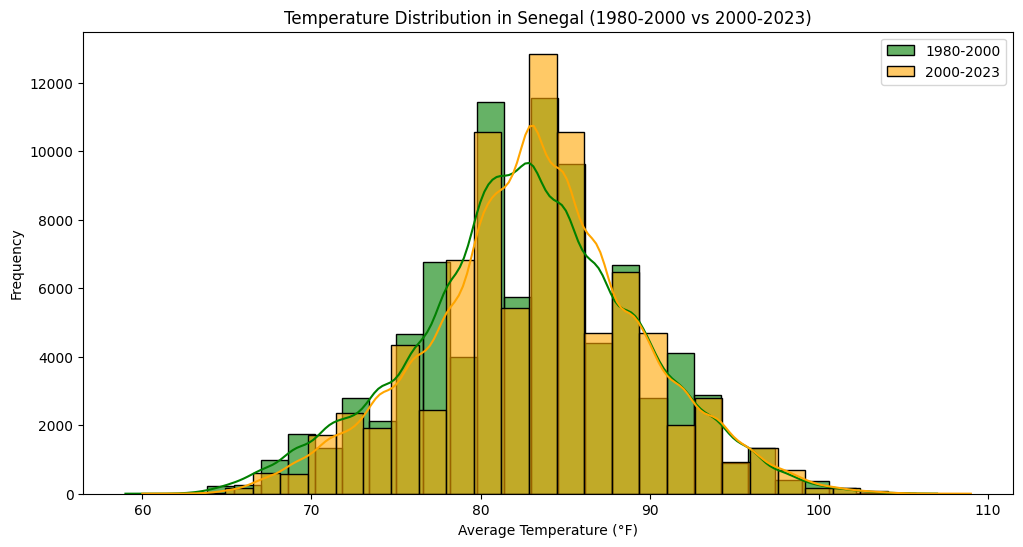

In [ ]:
# 5. Histograms for Senegal (1980-2000 vs 2000-2023)

senegal = df[df['COUNTRY'] == "Senegal"]
senegal_1980_2000 = senegal[(senegal['DATE'] >= '1980-01-01') & (senegal['DATE'] <= '2000-12-31')]
senegal_2000_2023 = senegal[(senegal['DATE'] > '2000-12-31') & (senegal["DATE"] <= "2023-12-31")]

plt.figure(figsize=(12, 6))
sns.histplot(senegal_1980_2000['TAVG'], color='green', label='1980-2000', kde=True, bins=30, alpha=0.6)
sns.histplot(senegal_2000_2023['TAVG'], color='orange', label='2000-2023', kde=True, bins=30, alpha=0.6)
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution in Senegal (1980-2000 vs 2000-2023)")
plt.legend()
plt.show()

The histogram above compares the distribution of temperatures in **Senegal** for two periods: 1980-2000 (Green) and 2000-2023 (Orange).

- The **orange (2000-2023)** distribution is shifted slightly to the right, indicating an increase in average temperatures over time.

- The **peak frequency** occurs around **80-85°F**. Temperatures in the more recent period appear to even reach higher maximum values.

This suggests warming in Senegal over the past two decades, with more extreme temperature occurrences.

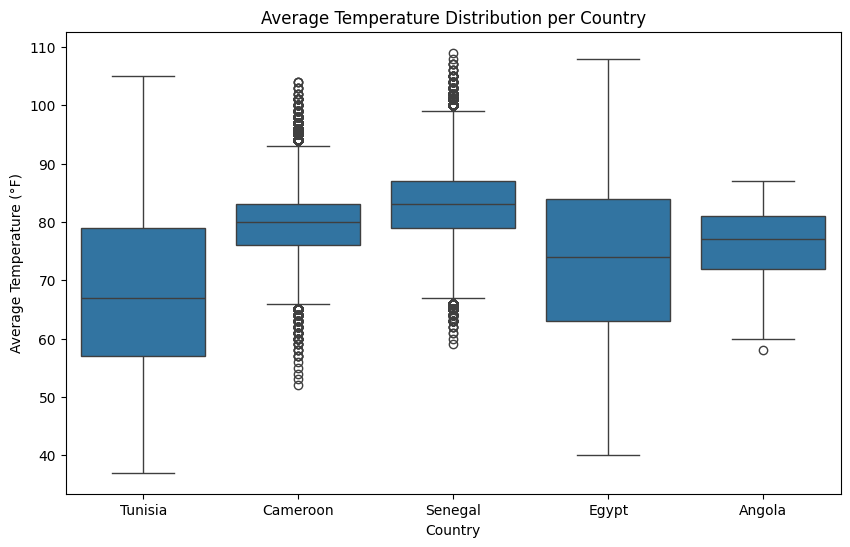

In [ ]:
# 6. Best chart for Average Temperature per Country

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='COUNTRY', y='TAVG')
plt.xlabel("Country")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature Distribution per Country")
plt.show()

The **box plot** above highlights the median temperature, interquartile range (IQR), and outliers.

- **Tunisia** and **Egypt** show a wider range of temperatures, meaning they experience significant temperature fluctuations.

- **Cameroon**, **Senegal**, and **Angola** show higher median temperatures.


Average Temperature per Country:
COUNTRY
Senegal     83.013183
Cameroon    79.544423
Angola      76.416228
Egypt       73.845316
Tunisia     67.675703
Name: TAVG, dtype: float64


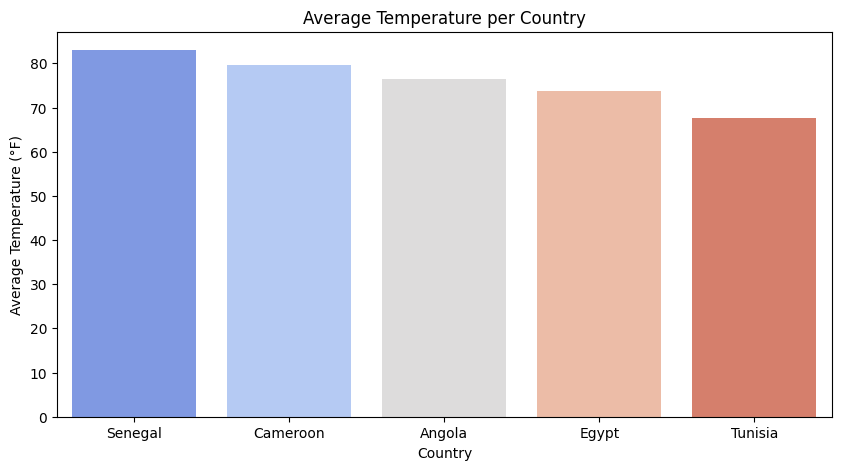

In [ ]:
# Question 1: Which country has the highest average temperature in the dataset?

country_avg_temp = df.groupby("COUNTRY")["TAVG"].mean().sort_values(ascending=False)
print("\nAverage Temperature per Country:")
print(country_avg_temp)

# Visualizing the highest average temperature
plt.figure(figsize=(10, 5))
sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette='coolwarm')
plt.xlabel("Country")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature per Country")
plt.show()

The **bar chart** above shows the average temperature for each of the five African countries.

- **Senegal** has the highest average temperature, while **Tunisia** has the lowest.

The chart provides a simple, direct comparison but doesn't give insights into temperature variability over time.

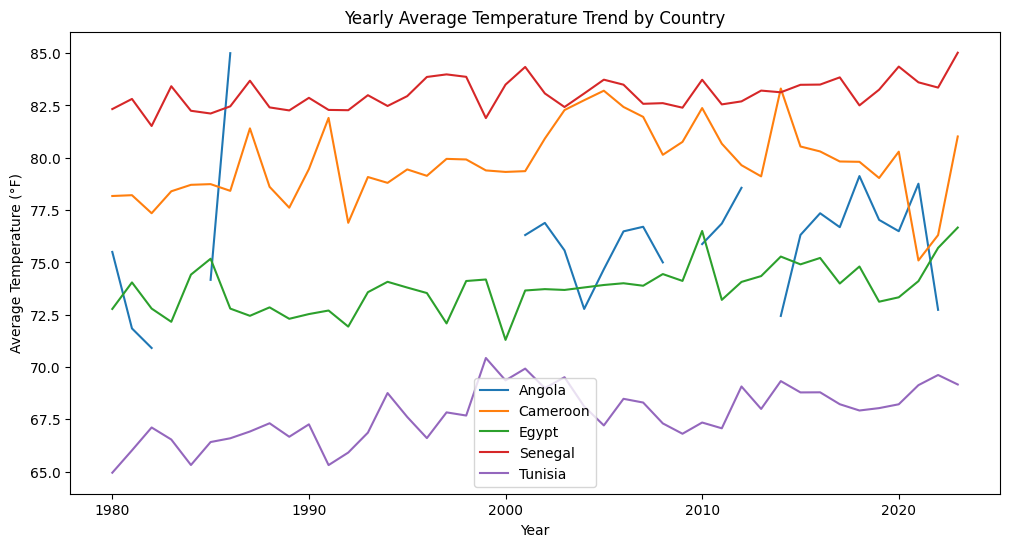

In [ ]:
# Question 2: Has the average temperature increased over time in each country?

# Grouping data by year and country
df["YEAR"] = df["DATE"].dt.year
yearly_avg_temp = df.groupby(["YEAR", "COUNTRY"])["TAVG"].mean().unstack()

# Plotting trends
plt.figure(figsize=(12, 6))
for country in yearly_avg_temp.columns:
    plt.plot(yearly_avg_temp.index, yearly_avg_temp[country], label=country)

plt.title("Yearly Average Temperature Trend by Country")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()

plt.show()

This line graph tracks average yearly temperatures for Angola, Cameroon, Egypt, Senegal, and Tunisia from 1980 to 2023.

- **Senegal (Red Line):** Has the highest average temperature, staying consistently above 82°F.

- **Cameroon (Orange Line):** Shows fluctuations but remains in the range of 77-82°F.

- **Egypt (Green Line):** Averages around 72-76°F with some fluctuations.

- **Angola (Blue Line):** Has a more erratic pattern but generally falls between 70-78°F.

- **Tunisia (Purple Line):** Has the lowest average temperatures, typically around 65-71°F.

**Overall**, there is a visible warming trend in most countries, suggesting **rising temperatures over time**.

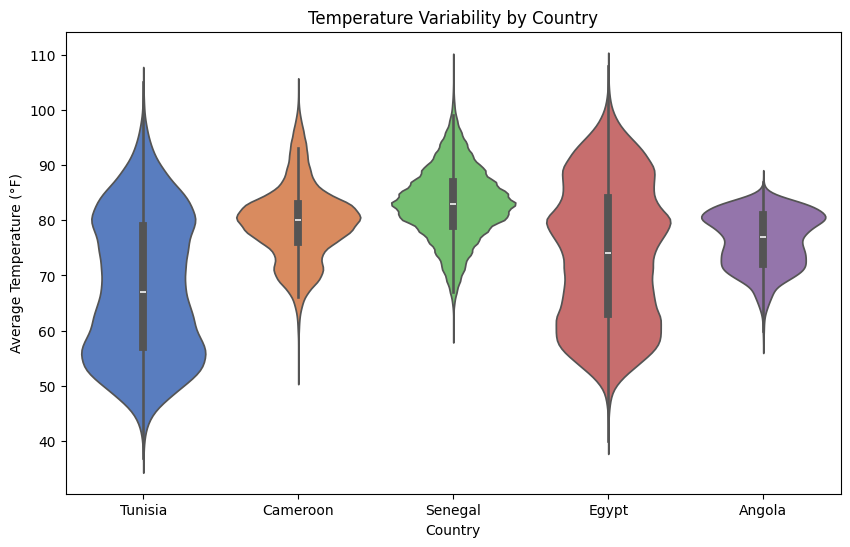

In [ ]:
# Question 3: Which country has the most variable temperature?

# Plotting violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["COUNTRY"], y=df["TAVG"], palette="muted")

plt.title("Temperature Variability by Country")
plt.xlabel("Country")
plt.ylabel("Average Temperature (°F)")

plt.show()

The **violin plot** above provides a deeper look at temperature distribution within each country.

The width at different points shows how often specific temperature ranges occur.

- **Egypt** and **Tunisia** show a wider spread, indicating high variability in temperature in both countries.

- **Angola** has the most compact distribution, suggesting that its temperatures are more stable compared to other countries.